In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### univariate analysis

In [5]:
print('This dataset has {} observations with {} features.'.format(df.shape[0], df.shape[1]))

This dataset has 200 observations with 5 features.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [8]:
# Finding the number of males and females in the data
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

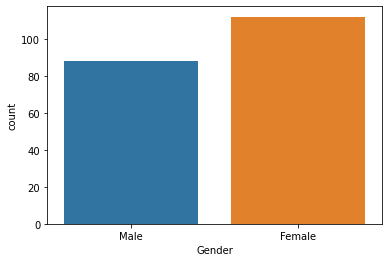

In [9]:
# Visualising the number of males and females in the data
sns.countplot(x="Gender",data=df,palette="tab10")
plt.show()

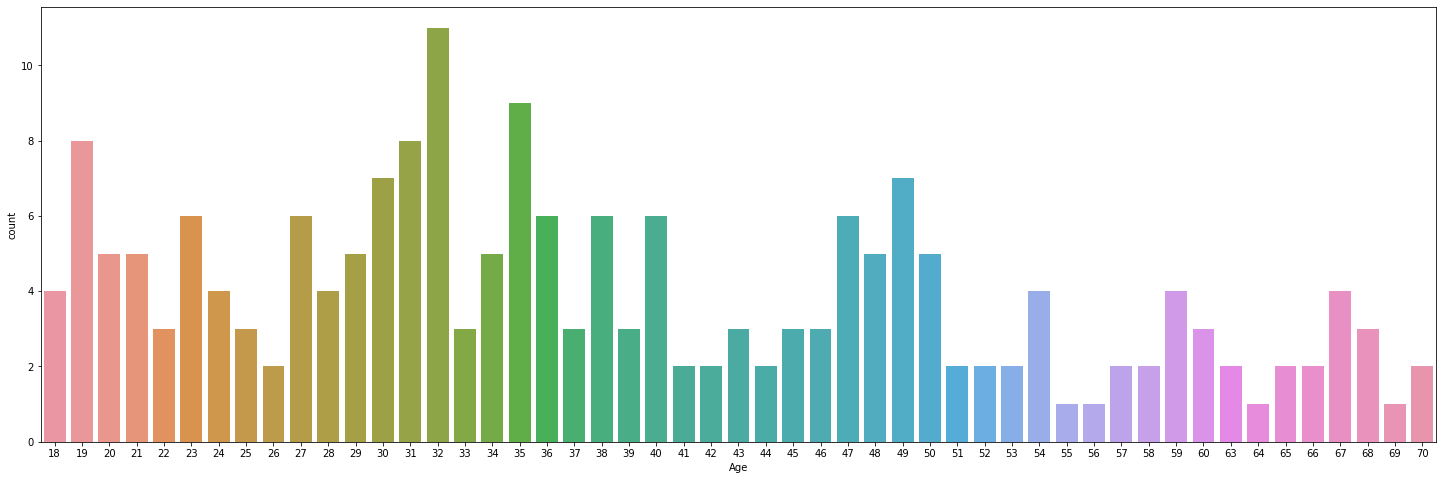

In [10]:
# Visualising the age distribution of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Age",data=df)
plt.show()


In [11]:
print(min(df.Age))
print(max(df.Age))

18
70


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='count'>

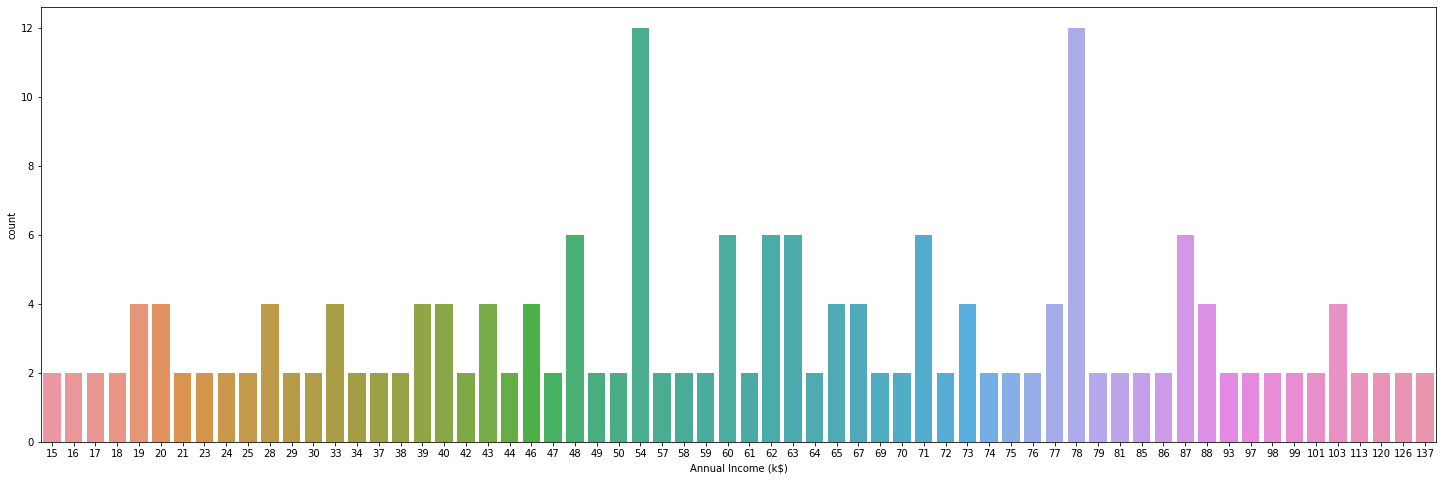

In [12]:
# Visualising the Income distribution of customers
plt.figure(figsize=(25,8))

sns.countplot(x="Annual Income (k$)",data=df)

### bi-variate analysis

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

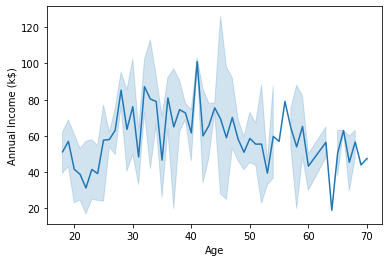

In [13]:
sns.lineplot(x = df["Age"], y=df["Annual Income (k$)"], palette ="bright")

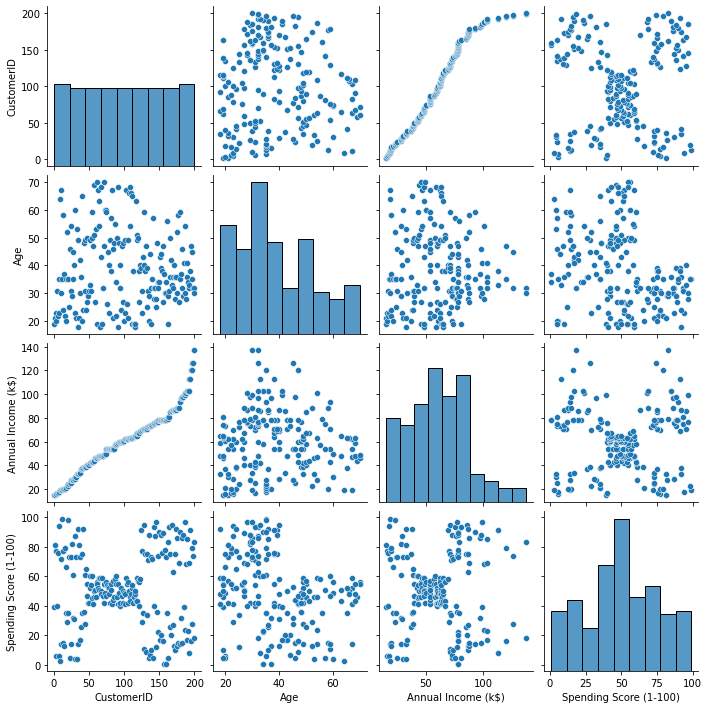

In [14]:
sns.pairplot(df)

## Perform descriptive statistics on the dataset

<AxesSubplot:>

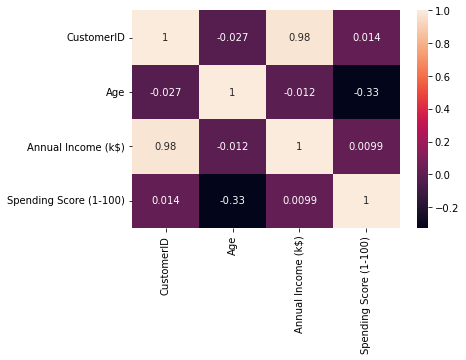

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Check for Missing values and deal with them

In [17]:
df.isna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [18]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [19]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Find the outliers and replace them outliers

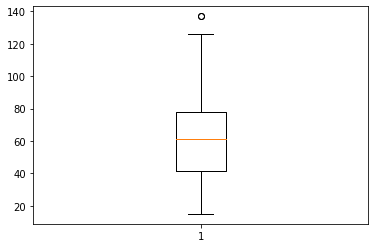

In [21]:
plt.boxplot(df['Annual Income (k$)'])
plt.show()


## Check for Categorical columns and perform encoding

In [22]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
numeric_data = df.select_dtypes(include=[np.number]) 
categorical_data = df.select_dtypes(exclude=[np.number]) 
print("Number of numerical variables: ", numeric_data.shape[1]) 
print("Number of categorical variables: ", categorical_data.shape[1])

Number of numerical variables:  4
Number of categorical variables:  1


In [24]:
print("Number of categorical variables: ", categorical_data.shape[1]) 
Categorical_variables = list(categorical_data.columns)
Categorical_variables

Number of categorical variables:  1


['Gender']

In [25]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['Gender'])
df["Gender"] = label

In [27]:
df['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

## Scaling the data

In [28]:
X = df.drop("Age",axis=1)
Y = df['Age']

In [29]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
scale = object.fit_transform(X) 
print(scale)

[[-1.7234121   1.12815215 -1.73899919 -0.43480148]
 [-1.70609137  1.12815215 -1.73899919  1.19570407]
 [-1.68877065 -0.88640526 -1.70082976 -1.71591298]
 [-1.67144992 -0.88640526 -1.70082976  1.04041783]
 [-1.6541292  -0.88640526 -1.66266033 -0.39597992]
 [-1.63680847 -0.88640526 -1.66266033  1.00159627]
 [-1.61948775 -0.88640526 -1.62449091 -1.71591298]
 [-1.60216702 -0.88640526 -1.62449091  1.70038436]
 [-1.5848463   1.12815215 -1.58632148 -1.83237767]
 [-1.56752558 -0.88640526 -1.58632148  0.84631002]
 [-1.55020485  1.12815215 -1.58632148 -1.4053405 ]
 [-1.53288413 -0.88640526 -1.58632148  1.89449216]
 [-1.5155634  -0.88640526 -1.54815205 -1.36651894]
 [-1.49824268 -0.88640526 -1.54815205  1.04041783]
 [-1.48092195  1.12815215 -1.54815205 -1.44416206]
 [-1.46360123  1.12815215 -1.54815205  1.11806095]
 [-1.4462805  -0.88640526 -1.50998262 -0.59008772]
 [-1.42895978  1.12815215 -1.50998262  0.61338066]
 [-1.41163905  1.12815215 -1.43364376 -0.82301709]
 [-1.39431833 -0.88640526 -1.43

In [30]:
X_scaled  = pd.DataFrame(scale, columns = X.columns)
X_scaled

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.738999,-0.434801
1,-1.706091,1.128152,-1.738999,1.195704
2,-1.688771,-0.886405,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.700830,1.040418
4,-1.654129,-0.886405,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.886405,2.268791,1.118061
196,1.671450,-0.886405,2.497807,-0.861839
197,1.688771,1.128152,2.497807,0.923953
198,1.706091,1.128152,2.917671,-1.250054


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=0)

In [32]:
X_train.shape

(160, 4)

In [33]:
X_test.shape

(40, 4)

In [34]:
Y_train.shape

(160,)

In [35]:
Y_test.shape

(40,)

## Clustering Algorithm

In [36]:
x = df.iloc[:, [3, 4]].values 

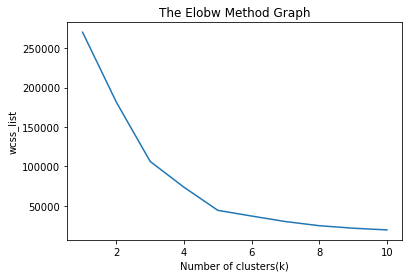

In [37]:
from sklearn.cluster import KMeans  
wcss_list= []   
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [38]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x) 

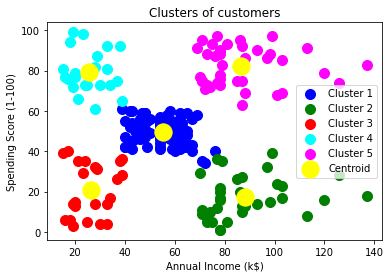

In [39]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  